In [1]:
import torch

1. 다음 텐서 예시의 랭크(rank)와 모양(shape)을 파이토치 코드로 확인해 보시오. [각 2 점]

<br/>

① 7

In [2]:
myTensor = torch.tensor(7)
print("모양(Shape):", myTensor.shape)
print("차원(rank):", myTensor.ndimension())

모양(Shape): torch.Size([])
차원(rank): 0


② [1,2,3],[4,5,6]

In [3]:
myTensor1 = torch.tensor([1,2,3])
myTensor2 = torch.tensor([4,5,6])

print("모양(Shape):", myTensor1.shape)
print("차원(rank):", myTensor1.ndimension())
                          
print("모양(Shape):", myTensor2.shape)
print("차원(rank):", myTensor2.ndimension())

모양(Shape): torch.Size([3])
차원(rank): 1
모양(Shape): torch.Size([3])
차원(rank): 1


③ [[1,2,3],[4,5,6]]

In [4]:
myTensor = torch.tensor([[1,2,3],[4,5,6]])
print("모양(Shape):", myTensor.shape)
print("차원(rank):", myTensor.ndimension())

모양(Shape): torch.Size([2, 3])
차원(rank): 2


④ [[[1,2,3],[4,5,6]]]

In [5]:
myTensor = torch.tensor([[[1,2,3],[4,5,6]]])
print("모양(Shape):", myTensor.shape)
print("차원(rank):", myTensor.ndimension())

모양(Shape): torch.Size([1, 2, 3])
차원(rank): 3


⑤ [[[[1,2,3],[4,5,6]]]]

In [6]:
myTensor = torch.tensor([[[[1,2,3],[4,5,6]]]])
print("모양(Shape):", myTensor.shape)
print("차원(rank):", myTensor.ndimension())

모양(Shape): torch.Size([1, 1, 2, 3])
차원(rank): 4


⑥ 파이토치 함수를 이용하여 차원을 인위적으로 늘려보세요

In [7]:
myTensor = torch.tensor([[1,2,3],[4,5,6], [7,8,9]])
print(myTensor)
print("바꾸기 이전 모양(Shape):", myTensor.shape)
print("바꾸기 이전 차원(rank):", myTensor.ndimension())
print()

myTensor = torch.unsqueeze(myTensor, 0)
print(myTensor)
print("unsqeeze() 이후 모양(Shape):", myTensor.shape)
print("unsqeeze() 이후 차원(rank):", myTensor.ndimension())
print()

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
바꾸기 이전 모양(Shape): torch.Size([3, 3])
바꾸기 이전 차원(rank): 2

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
unsqeeze() 이후 모양(Shape): torch.Size([1, 3, 3])
unsqeeze() 이후 차원(rank): 3



⑦ 파이토치 함수를 이용하여 랭크 중 크기가 1 인 랭크를 삭제해보세요

In [8]:
myTensor = torch.squeeze(myTensor, 0)
print(myTensor)
print("sqeeze() 이후 모양(Shape):", myTensor.shape)
print("sqeeze() 이후 차원(rank):", myTensor.ndimension())
print()

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
sqeeze() 이후 모양(Shape): torch.Size([3, 3])
sqeeze() 이후 차원(rank): 2



⑧ 파이토치 함수를 이용하여 ⑦번 결과의 텐서를 랭크 1 의 모양으로 바꿔보세요

In [9]:
myTensor = myTensor.view(9)
print(myTensor)
print("view() 이후 모양(Shape):", myTensor.shape)
print("view() 이후 차원(rank):", myTensor.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
view() 이후 모양(Shape): torch.Size([9])
view() 이후 차원(rank): 1


⑨ 만일 ⑦번 결과의 텐서를 x 로 배정하고 아래와 같은 코드를 적용했다면 그 결과는?

```python
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력
```

In [10]:
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력

name 'x' is not defined


#### 원소가 9개인 텐서를 2 x 4, 즉 원소가 8개인 텐서로 바꿀 수는 없습니다.

<br/><br/>

#### 2. 다음 함수를 x 에 대해 미분한 값 ∂f / ∂x 는 무엇인가? ①손으로도 구하고, ②파이토치 코드로도 구하시오. 
[각 5 점]

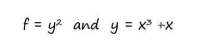

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import torch

x = torch.tensor(2.0, requires_grad=True)
y = x**3 + x
f = y**2

f.backward()
print("f를 x로 미분한 값은 {}".format(x.grad))

f를 x로 미분한 값은 260.0


In [12]:
# 참고
# 심파이 사용
import sympy as sp

x, y = sp.symbols("x y")
y = x**3 + x
f = y**2

# 미분
fprime = f.diff(x)
fprime

# x에 2 대입
# fprime.subs(x, 2)
# 여러 개의 변수도 대입 가능
# f.subs([(x, 2), (y, 3)]) # x에 2 대입, y에 3 대입

(6*x**2 + 2)*(x**3 + x)

<br/><br/>

####  3. www.kaggle.com 에서 제공하는 weight and height 데이터세트를 가져와서 주어진 몸무게로 키를 예측할 수 있는 모델을 구현하시오. [25점]

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 넘파이와 파이토치를 불러옵니다.
import numpy as np
import torch

# Neural Network의 약자로 인공신경망 연산들이 들어가 있습니다. (ex. Linear, Convolution, RNN 등등)
import torch.nn as nn           

# 모델을 최적화 하는데 필요한 최적화 함수들이 들어가 있습니다 (ex. SGD, ADAM, LBFGS 등등)
import torch.optim as optim

# 텐서를 초기화 하는 함수들이 들어가 있습니다. (ex. uniform, normal, xavier 등등)
import torch.nn.init as init

# 데이터나 학습 결과를 출력하기 위해 사용합니다.
import matplotlib.pyplot as plt
import pandas

In [14]:
f = open('./data/weight-height.csv')
data = f.read()
f.close
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))
print(lines[0])

<function TextIOWrapper.close()>

['"Gender"', '"Height"', '"Weight"']
10000
"Male",73.847017017515,241.893563180437


① 테스트 세트의 차원 형태(dimension shape)를 출력해 보세요.

In [15]:
info = pandas.read_csv("./data/weight-height.csv",  encoding='euc-kr')
info_df = info
info_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [16]:
height = info.iloc[:,1] 
weight = info.iloc[:,2] # 몸무게

x = torch.FloatTensor(np.array(height))
y = torch.FloatTensor(np.array(weight))

print(weight.shape)
print(weight.shape)

(10000,)
(10000,)


In [17]:
print("데이터 세트의 차원:", info_df.ndim)

데이터 세트의 차원: 2


<br/>

② 데이터 세트의 첫 번째 데이터를 출력해 보세요

- 키는 인치, 몸무게는 파운드인 것으로 보인다.

In [18]:
print("키 첫번째 데이터:", height[0])
print("몸무게 첫번째 데이터:", weight[0])

키 첫번째 데이터: 73.847017017515
몸무게 첫번째 데이터: 241.893563180437


③ 남성과 여성 데이터 각각을 학습 세트와 테스트 세트로 5:5 비율로 나누고 각 4개 세트의 첫 데이터와 마지막 데이터를 출력해보세요.

In [19]:
info.groupby("Gender").head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


In [20]:
# 여성과 남성을 나누는 함수
def divide_male_female(data):
    grouped = info.groupby("Gender")
    male = grouped.get_group("Male")
    female = grouped.get_group("Female")
    return male, female

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  # 랜덤 할당
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

male, female = divide_male_female(info)
m_train_set, m_test_set = split_train_test(male, 0.5)
f_train_set, f_test_set = split_train_test(female, 0.5)

print("남성 학습 세트 수:",len(m_train_set), ", 남성 테스트 세트 수:", len(m_test_set))
print("여성 학습 세트 수:",len(f_train_set), ", 여성 테스트 세트 수:", len(f_test_set))

남성 학습 세트 수: 2500 , 남성 테스트 세트 수: 2500
여성 학습 세트 수: 2500 , 여성 테스트 세트 수: 2500


In [21]:
print()
print(m_train_set.iloc[0]) # 학습 세트 첫 데이터

print()
print(m_train_set.iloc[-1]) # 학습 세트 마지막 데이터

print()
print(m_test_set.iloc[0]) # 테스트 세트 첫 데이터

print()
print(m_test_set.iloc[-1]) # 테스트 세트 마지막 데이터


Gender          Male
Height     68.573542
Weight    199.487271
Name: 3571, dtype: object

Gender          Male
Height     73.706027
Weight    231.697887
Name: 4692, dtype: object

Gender          Male
Height      72.87036
Weight    211.342497
Name: 49, dtype: object

Gender          Male
Height     71.705273
Weight    202.609008
Name: 316, dtype: object


In [22]:
print()
print(f_train_set.iloc[0]) # 학습 세트 첫 데이터

print()
print(f_train_set.iloc[-1]) # 학습 세트 마지막 데이터

print()
print(f_test_set.iloc[0]) # 테스트 세트 첫 데이터

print()
print(f_test_set.iloc[-1]) # 테스트 세트 마지막 데이터


Gender        Female
Height     61.772413
Weight    119.262169
Name: 8053, dtype: object

Gender        Female
Height     60.584721
Weight    116.051246
Name: 8776, dtype: object

Gender        Female
Height     63.172555
Weight    128.091026
Name: 7984, dtype: object

Gender        Female
Height     68.752176
Weight    174.580379
Name: 7095, dtype: object


④ 2차원 평면에 남성과 여성의 데이터 포인트들을 다른 색상으로 구분하여 가시화해보세요.

Text(0.5, 0, 'Weight (Pounds)')

Text(0, 0.5, 'Height (Inches)')

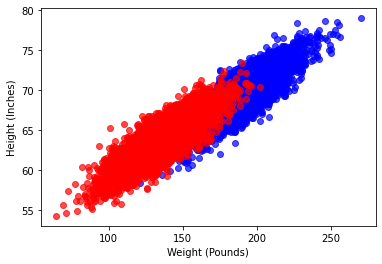

In [23]:
m_height = male.iloc[:,1]
m_weight = male.iloc[:,2]

f_height = female.iloc[:,1]
f_weight = female.iloc[:,2]

# alpha는 투명도 설정
# c는 색상 설정
plt.scatter(m_weight, m_height, c="blue", alpha=0.7)
plt.scatter(f_weight, f_height, c="red", alpha=0.7)
plt.xlabel("Weight (Pounds)")
plt.ylabel("Height (Inches)")
plt.show()

⑤ 완전 연결 NN 모델을 설계하고 학습 모델의 각 계층별 요약과 파라미터 수를 출력해보세요

In [24]:
model = nn.Sequential(
          nn.Linear(1,25),
          nn.ReLU(),
          nn.Linear(25,50),
          nn.ReLU(),
          nn.Linear(50,1),
      )

In [25]:
# gpu가 사용 가능한 경우에는 device를 0번 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 모델 자녀 노드의 이름과 모듈을 출력합니다.
for i in model.named_children():
    print(i)

cuda:0
('0', Linear(in_features=1, out_features=25, bias=True))
('1', ReLU())
('2', Linear(in_features=25, out_features=50, bias=True))
('3', ReLU())
('4', Linear(in_features=50, out_features=1, bias=True))


⑥ 남성 학습 세트로 학습 모델을 학습시키고 남성 테스트 세트로 정확도(mean average error)를 평가해보세요.

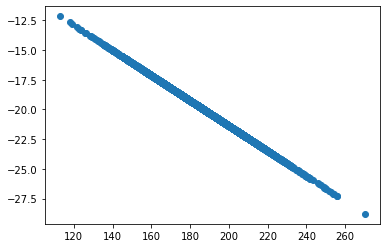

tensor(89.0336)


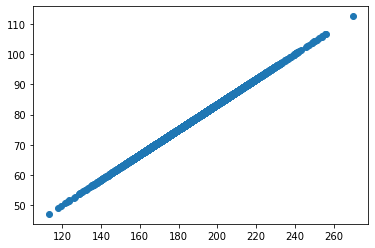

tensor(9.2946)


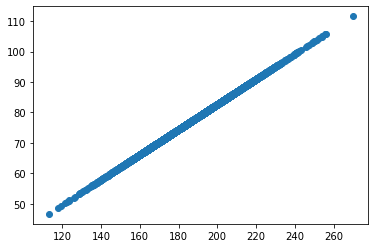

tensor(8.7049)


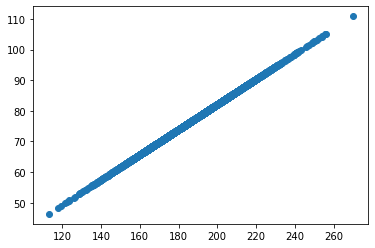

tensor(8.2460)


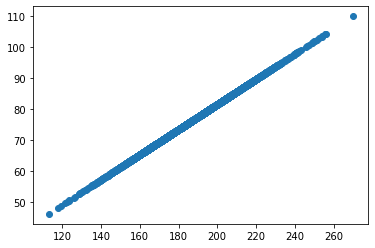

tensor(7.7847)


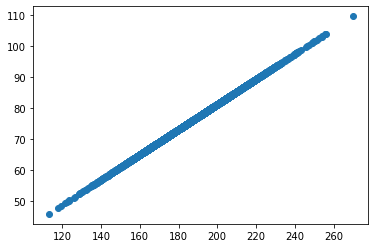

tensor(7.4493)


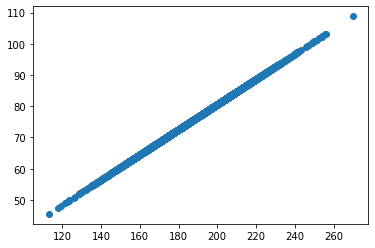

tensor(7.0858)


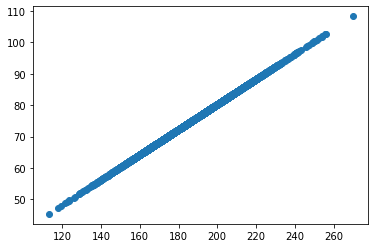

tensor(6.8311)


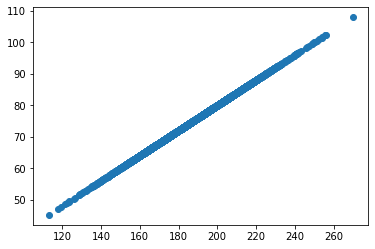

tensor(6.6101)


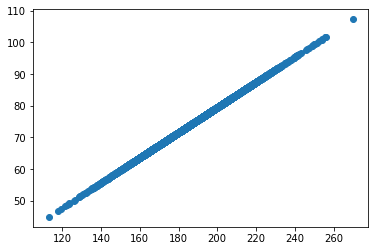

tensor(6.2638)


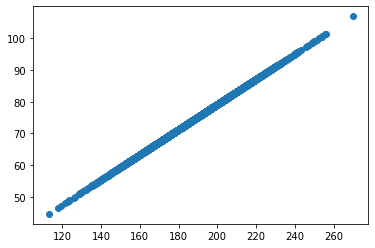

tensor(6.0878)


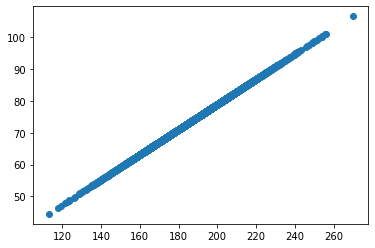

tensor(5.9168)


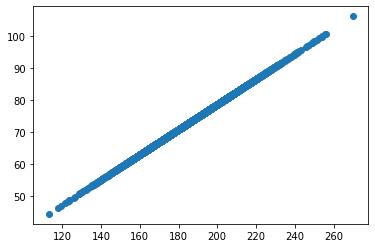

tensor(5.7401)


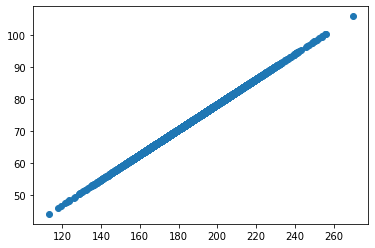

tensor(5.5883)


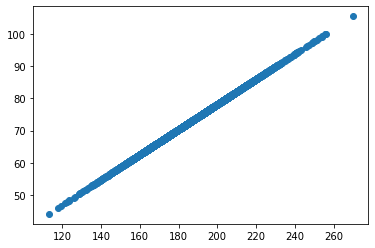

tensor(5.4913)


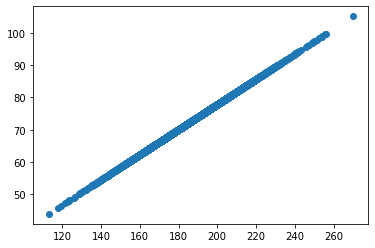

tensor(5.3348)


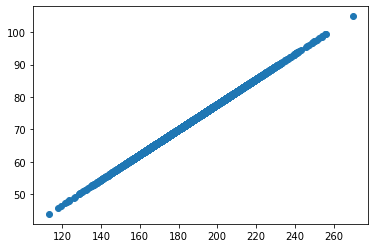

tensor(5.2507)


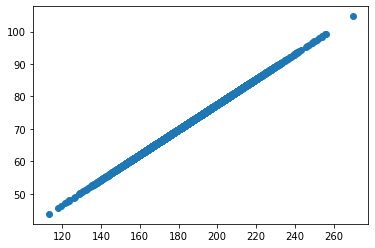

tensor(5.1749)


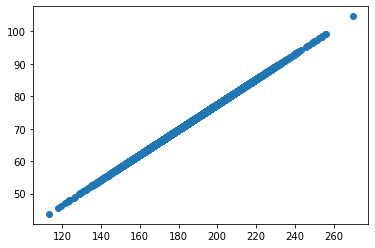

tensor(5.1430)


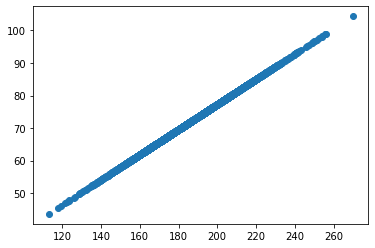

tensor(5.0347)


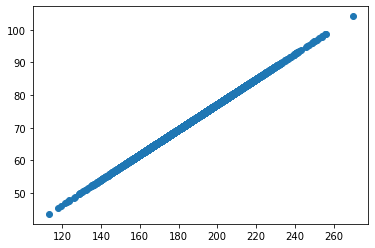

tensor(4.9695)


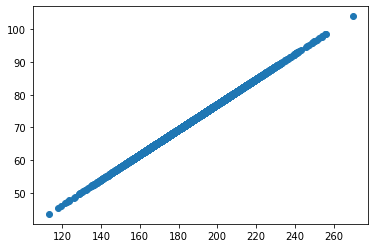

tensor(4.9207)


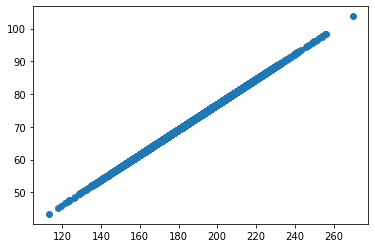

tensor(4.8403)


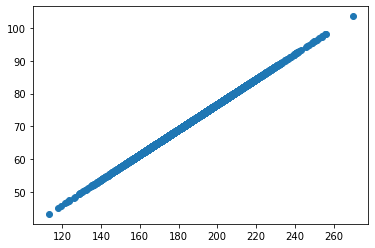

tensor(4.7761)


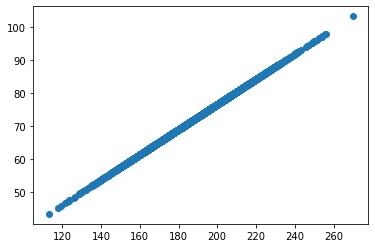

tensor(4.7182)


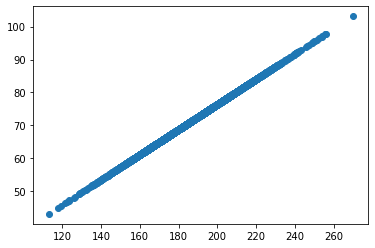

tensor(4.6468)


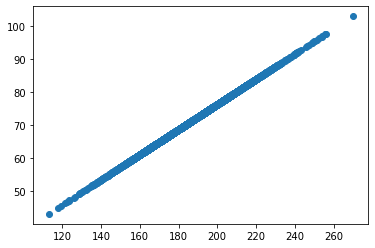

tensor(4.5862)


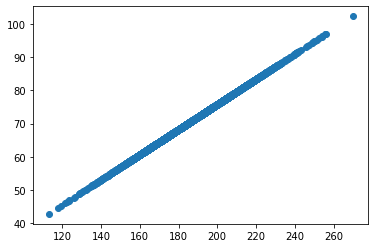

tensor(4.4240)


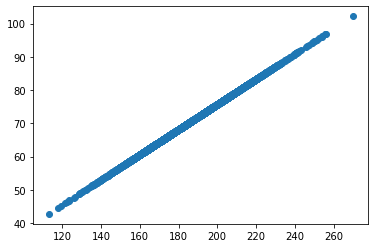

tensor(4.4066)


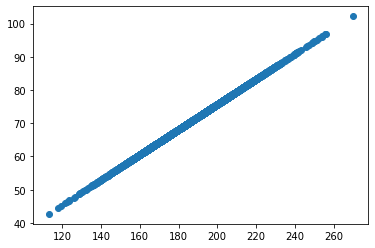

tensor(4.3991)


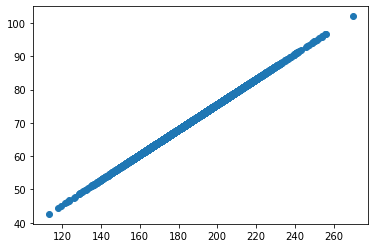

tensor(4.3623)


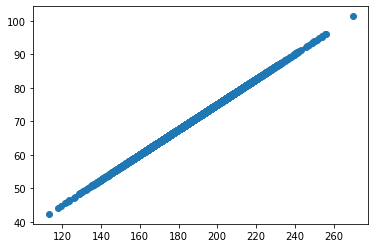

tensor(4.2315)


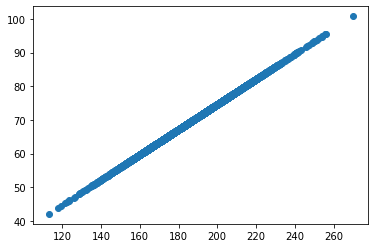

tensor(4.1391)


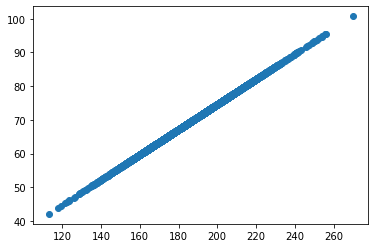

tensor(4.1349)


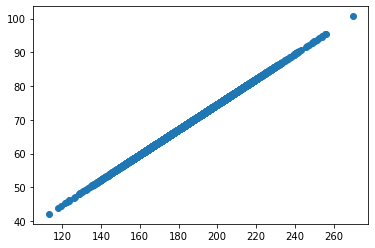

tensor(4.1313)


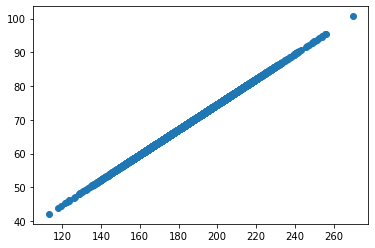

tensor(4.1326)


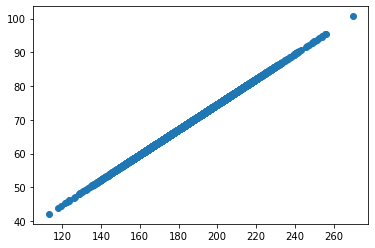

tensor(4.1307)


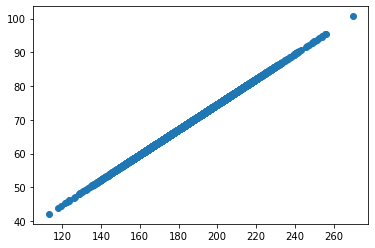

tensor(4.1310)


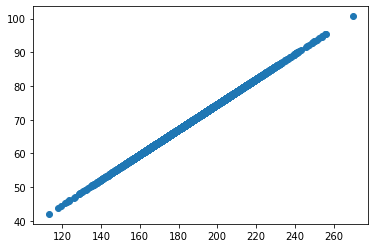

tensor(4.1281)


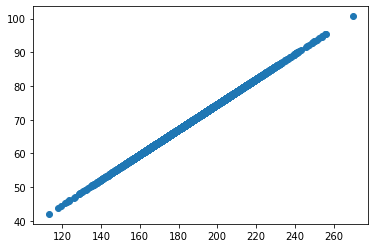

tensor(4.1282)


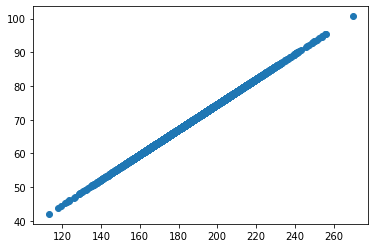

tensor(4.1273)


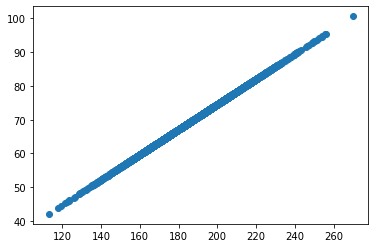

tensor(4.1262)


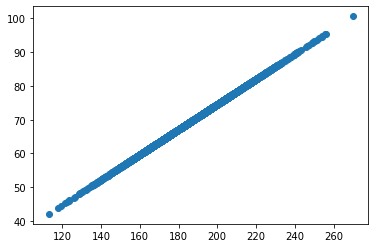

tensor(4.1230)


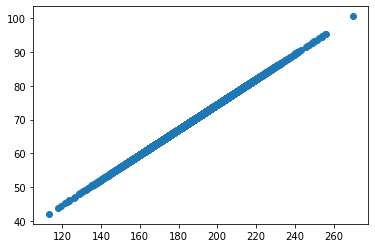

tensor(4.1212)


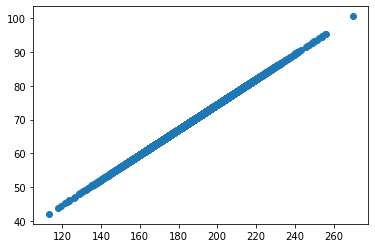

tensor(4.1204)


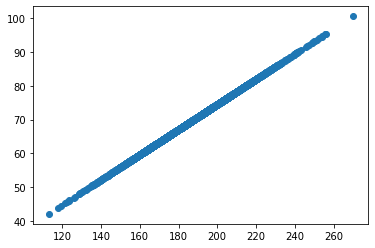

tensor(4.1172)


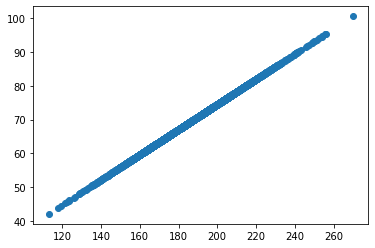

tensor(4.1169)


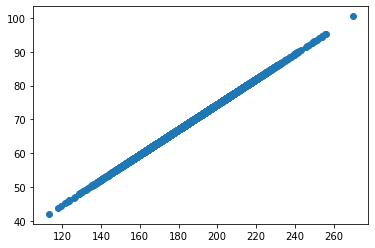

tensor(4.1108)


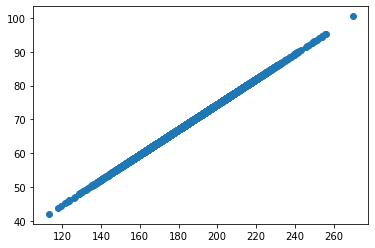

tensor(4.1101)


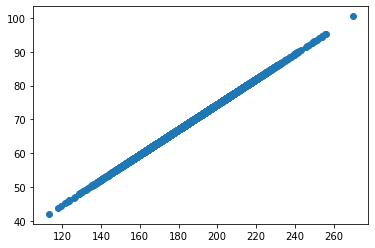

tensor(4.1102)


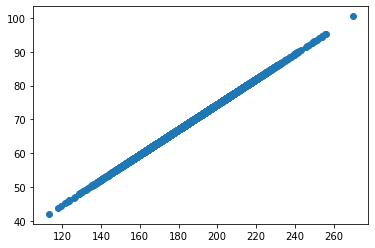

tensor(4.1083)


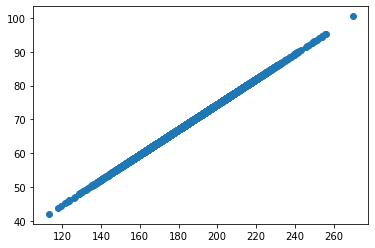

tensor(4.1081)


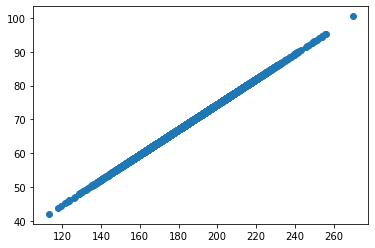

tensor(4.1078)


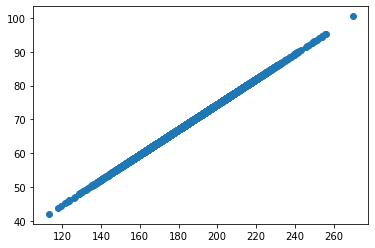

tensor(4.1074)


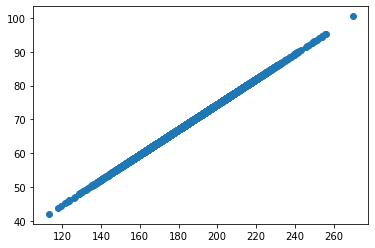

tensor(4.1079)


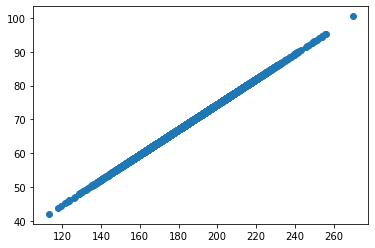

tensor(4.1074)


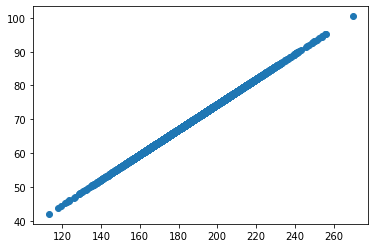

tensor(4.1032)


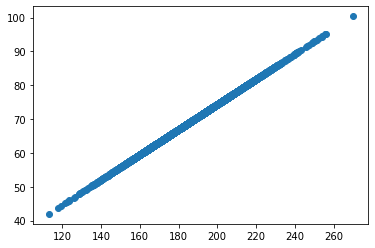

tensor(4.0943)


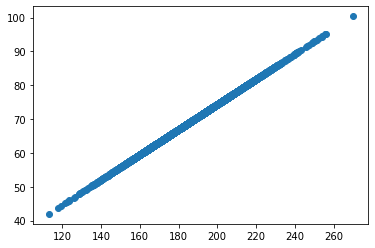

tensor(4.0938)


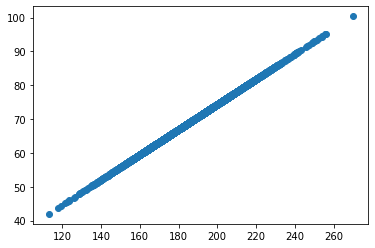

tensor(4.0934)


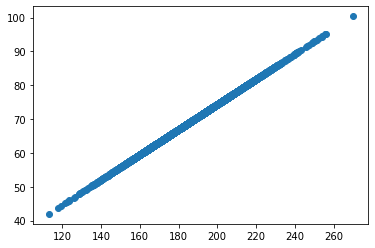

tensor(4.0928)


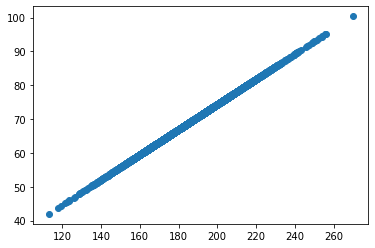

tensor(4.0932)


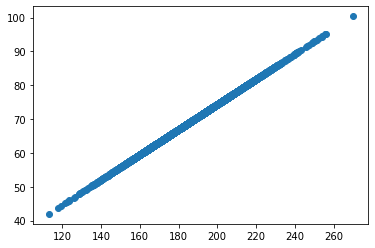

tensor(4.0927)


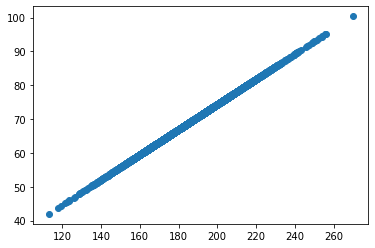

tensor(4.0930)


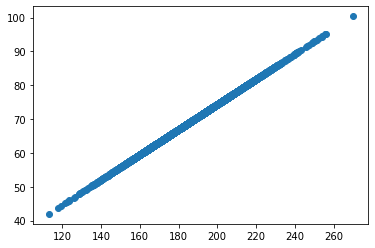

tensor(4.0908)


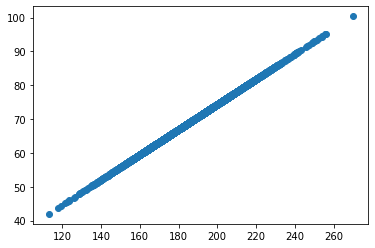

tensor(4.0919)


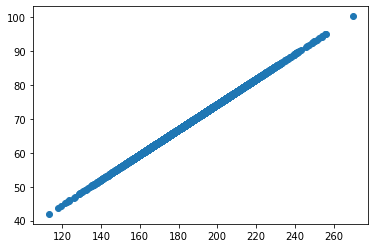

tensor(4.0886)


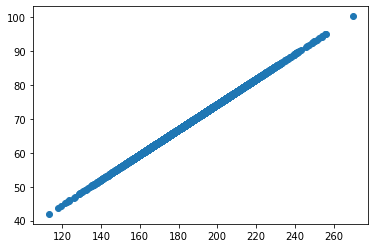

tensor(4.0887)


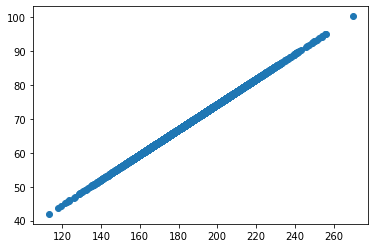

tensor(4.0881)


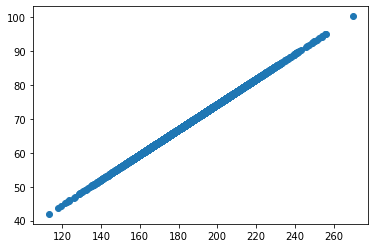

tensor(4.0882)


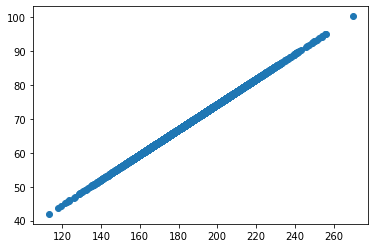

tensor(4.0875)


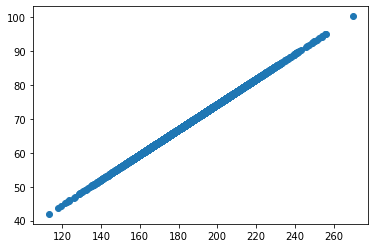

tensor(4.0860)


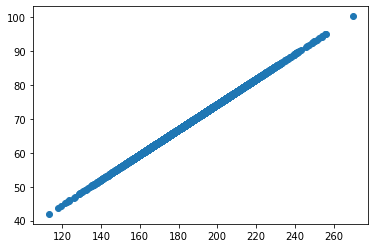

tensor(4.0860)


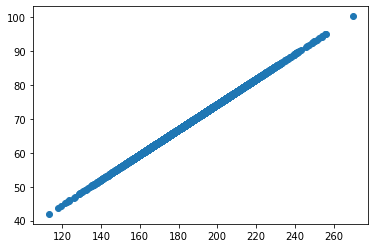

tensor(4.0877)


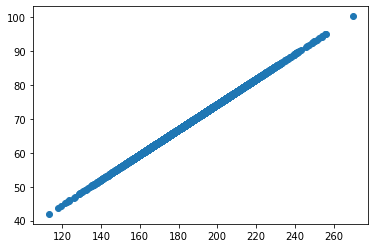

tensor(4.0845)


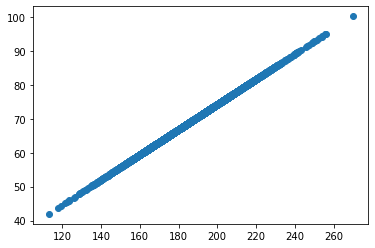

tensor(4.0819)


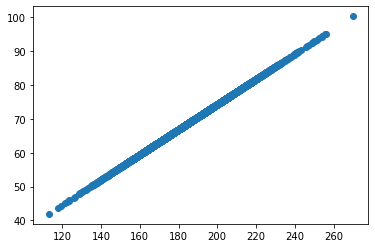

tensor(4.0814)


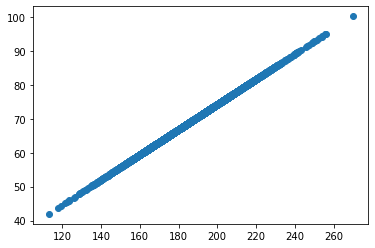

tensor(4.0824)


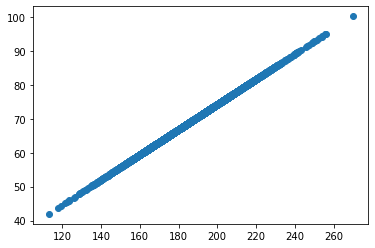

tensor(4.0819)


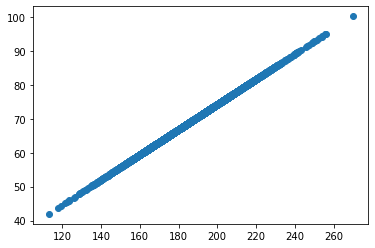

tensor(4.0822)


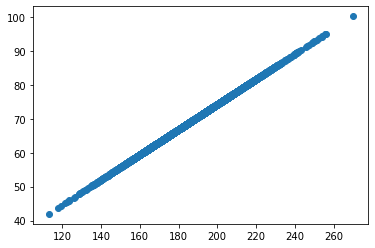

tensor(4.0816)


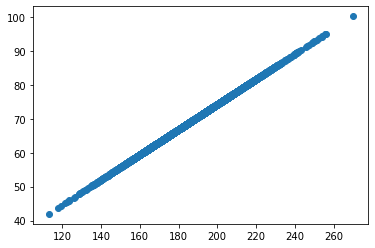

tensor(4.0819)


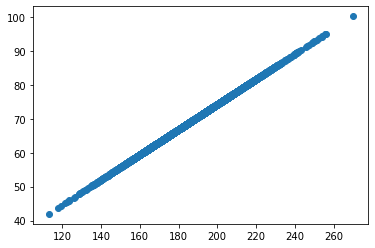

tensor(4.0821)


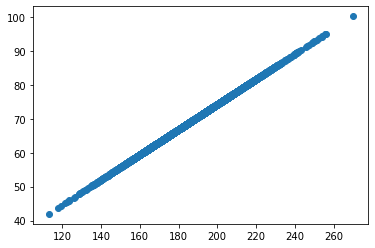

tensor(4.0815)


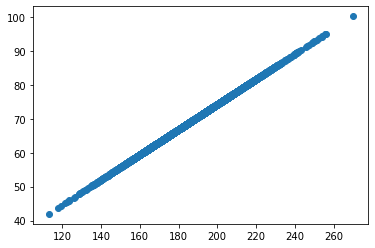

tensor(4.0818)


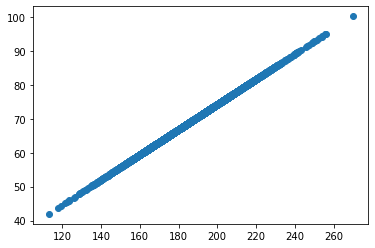

tensor(4.0813)


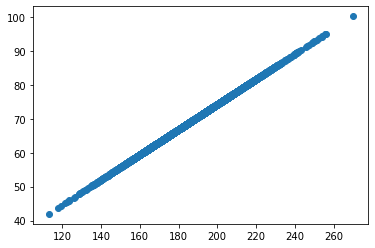

tensor(4.0816)


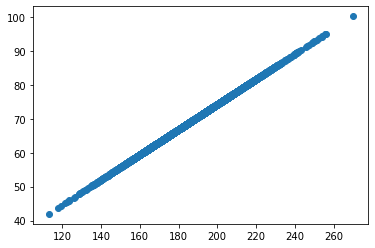

tensor(4.0818)


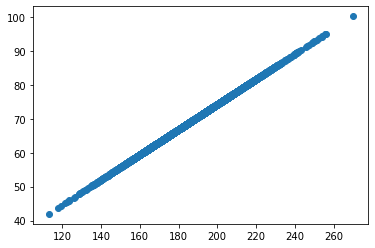

tensor(4.0812)


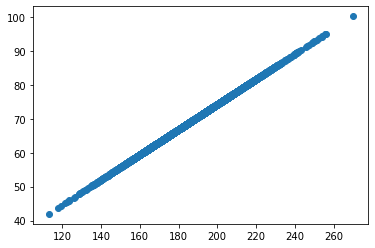

tensor(4.0813)


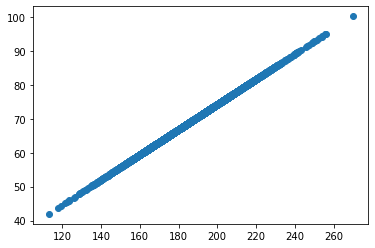

tensor(4.0815)


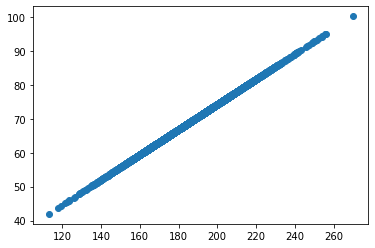

tensor(4.0808)


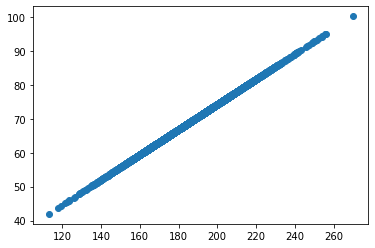

tensor(4.0809)


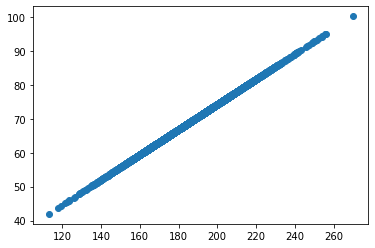

tensor(4.0811)


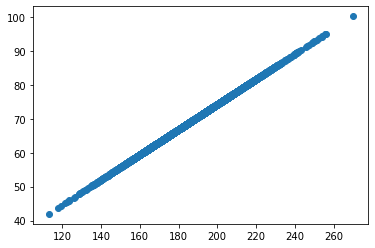

tensor(4.0804)


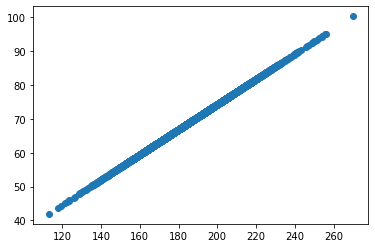

tensor(4.0798)


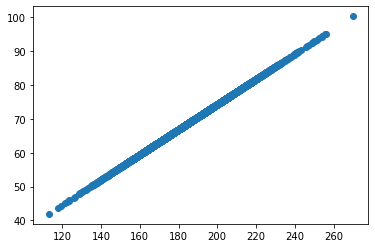

tensor(4.0789)


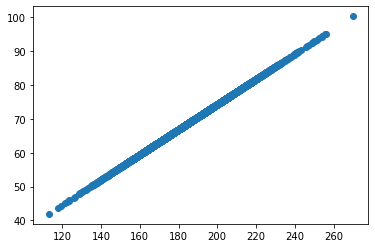

tensor(4.0787)


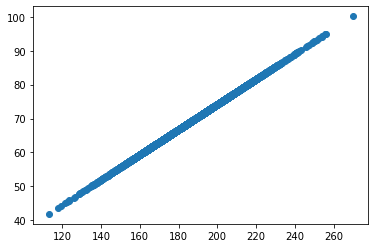

tensor(4.0678)


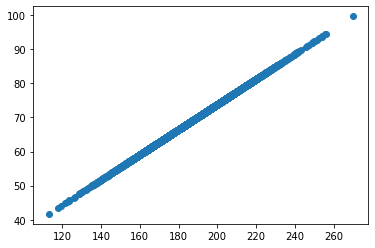

tensor(4.0329)


In [26]:
num_epoch = 1000
lr = 0.0002

m_train_weight_data = male.iloc[:,2]
m_train_height_data = male.iloc[:,1]

# Series 형을 ndarry로 ndarray에서 Tensor로 변환
x = np.array(m_train_weight_data).reshape(len(m_train_weight_data), 1)
y = np.array(m_train_height_data).reshape(len(m_train_height_data), 1)
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=lr)

loss_arr = []
for i in range(num_epoch):
  
    # 이전 학습의 기울기를 지우고 최적화 함수를 초기화해줍니다.
    # 기울기를 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않습니다.
    optimizer.zero_grad()
    
    # 입력값 x를 모델에 넣어 결과값을 얻습니다.
    output = model(x)
    
    # 결과값과 목표값의 차이를 L1 손실 함수로 구해줍니다.
    loss = loss_func(output,y)
    
    # 손실에 대한 기울기를 구합니다.
    loss.backward()
    
    # 구한 기울기를 이용해 모델의 변수를 업데이트 합니다.
    optimizer.step()
    
    if i % 10 == 0:
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.show()
        print(loss.data)
        
    # 손실을 loss_arr에 추가해줍니다.
    loss_arr.append(loss.detach().numpy())

⑦ 에포크를 10 이상으로 설정하고 에포크별 테스트 MAE(mean average error) 그래프를 그려보세요

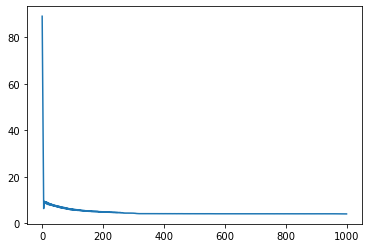

In [27]:
plt.plot(loss_arr)
plt.show()